In [1]:
import numpy as np
import pandas as pd
import datasist as ds
import re
import string
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spam.csv', encoding= 'latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
ds.structdata.describe(df)

First five data points


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN




Random five data points


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3365,ham,I am waiting for your call sir.,NaN,NaN,NaN
4925,ham,"Oh yes, why is it like torture watching england?",NaN,NaN,NaN
4666,ham,I send the print outs da.,NaN,NaN,NaN
2489,ham,I have 2 docs appointments next week.:/ I'm ti...,NaN,NaN,NaN
4449,ham,"Awesome, be there in a minute",NaN,NaN,NaN




Last five data points


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN




Shape of  data set: (5572, 5)


Size of  data set: 27860


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
v1,object
v2,object
Unnamed: 2,object
Unnamed: 3,object
Unnamed: 4,object




Numerical Features in Data set
[]


Categorical Features in Data set


['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']



Statistical Description of Columns


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2




Description of Categorical Features


,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2




Unique class Count of Categorical features


,Feature,Unique Count
0,v1,2
1,v2,5169
2,Unnamed: 2,44
3,Unnamed: 3,11
4,Unnamed: 4,6




Missing Values in Data


,features,missing_counts,missing_percent
0,v1,0,0.0
1,v2,0,0.0
2,Unnamed: 2,5522,99.1
3,Unnamed: 3,5560,99.8
4,Unnamed: 4,5566,99.9


In [4]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)
df.sample(5)

,v1,v2
1079,ham,Me too watching surya movie only. . .after 6 p...
4721,ham,"I'm home, my love ... If your still awake ... ..."
1118,ham,I'm going 4 lunch now wif my family then aft d...
3751,ham,Why are u up so early?
1687,spam,Free Top ringtone -sub to weekly ringtone-get ...


In [5]:
df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)
df.sample(2)

,target,text
3171,ham,Do u still have plumbers tape and a wrench we ...
3405,ham,\HEY DAS COOL... IKNOW ALL 2 WELLDA PERIL OF S...


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [7]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#Search for duplicated values
df.duplicated().sum()

403

In [9]:
#Drop duplicated values
df = df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

In [11]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

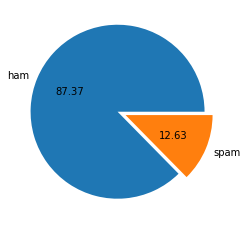

In [12]:
plt.pie(df['target'].value_counts(), explode = [0.1,0], labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [13]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [14]:
df['characters']=df['text'].apply(len)

In [15]:
df.head()

,target,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
df['word_num']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [17]:
df.head()

,target,text,characters,word_num
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [18]:
df['sentence_num']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
df.head()

,target,text,characters,word_num,sentence_num
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
df[['characters','word_num','sentence_num']].describe()

,characters,word_num,sentence_num
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
#ham
df[df['target'] == 0][['characters','word_num','sentence_num']].describe()

,characters,word_num,sentence_num
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
#spam
df[df['target'] == 1][['characters','word_num','sentence_num']].describe()

,characters,word_num,sentence_num
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


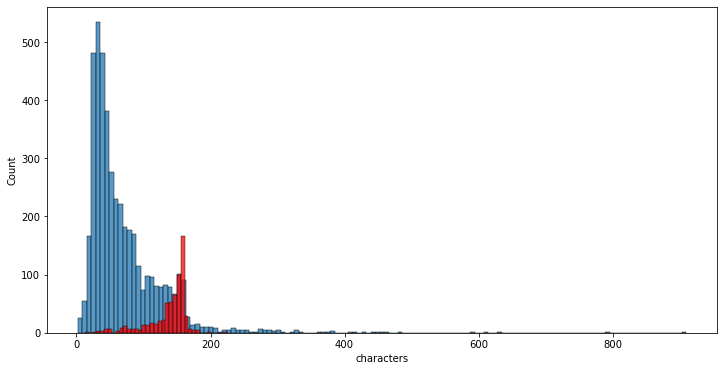

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['characters'])
sns.histplot(df[df['target'] == 1]['characters'], color = 'red')
plt.show()

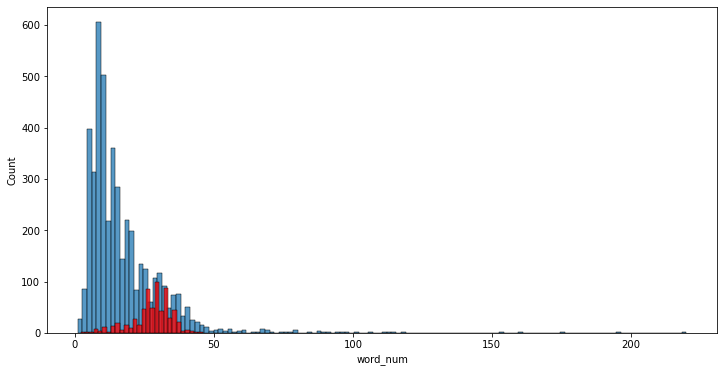

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['word_num'])
sns.histplot(df[df['target'] == 1]['word_num'], color = 'red')
plt.show()

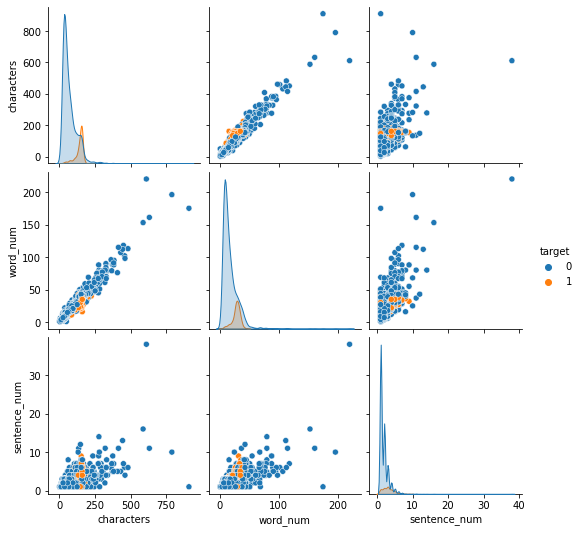

In [25]:
sns.pairplot(df,hue = 'target')
plt.show()

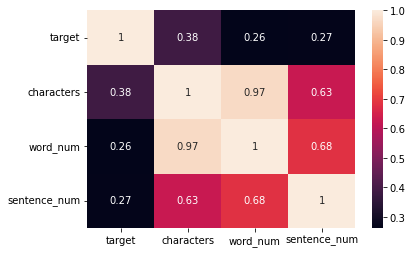

In [26]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [27]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [28]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [30]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
df['transformed_text'] = df['text'].apply(text_transform)

In [32]:
df.head()

,target,text,characters,word_num,sentence_num,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')

In [35]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

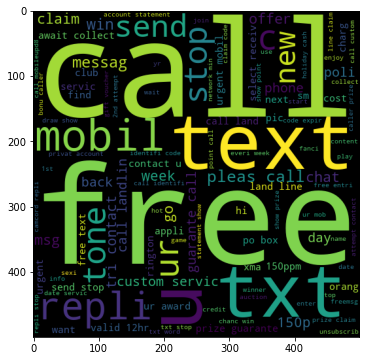

In [36]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

In [37]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

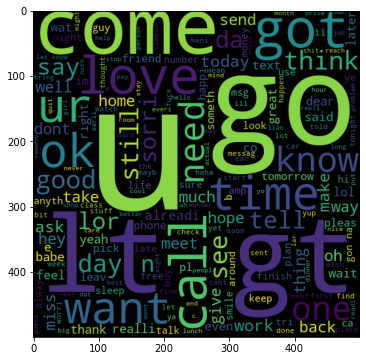

In [38]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)
plt.show()

## Building Model

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features =3000)

In [40]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [41]:
X.shape

(5169, 3000)

In [42]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [45]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [46]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [47]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy Score =', round(accuracy_score(y_test,y_pred1) * 100,2),'%')
print('Confusion Matrix =',confusion_matrix(y_test,y_pred1))
print('Precision Score =', round(precision_score(y_test,y_pred1) * 100,2),'%')

Accuracy Score = 86.94 %
Confusion Matrix = [[788 108]
 [ 27 111]]
Precision Score = 50.68 %


In [48]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print('Accuracy Score =', round(accuracy_score(y_test,y_pred1) * 100,2),'%')
print('Confusion Matrix =',confusion_matrix(y_test,y_pred1))
print('Precision Score =', round(precision_score(y_test,y_pred1) * 100,2),'%')

Accuracy Score = 97.1 %
Confusion Matrix = [[896   0]
 [ 30 108]]
Precision Score = 100.0 %


In [49]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print('Accuracy Score =', round(accuracy_score(y_test,y_pred1) * 100,2),'%')
print('Confusion Matrix =',confusion_matrix(y_test,y_pred1))
print('Precision Score =', round(precision_score(y_test,y_pred1) * 100,2),'%')

Accuracy Score = 98.36 %
Confusion Matrix = [[895   1]
 [ 16 122]]
Precision Score = 99.19 %


## Pickle File

In [50]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))